In [10]:
import keras
keras.__version__

'2.3.1'

## 2.1 신경망과의 첫 만남
- 흑백 손글씨 숫자 이미지(28 * 28 픽셀)를 0부터 9까지의 10개의 범주로 분류
### 2-1 케라스에서 MNIST 데이터셋 적재하기

In [12]:
# 데이터 로드
from keras.datasets import mnist
(train_images, train_labels), (test_images,test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 13s 1us/step


- train_images와 train_labels : 모델이 학습해야 할 훈련 세트를 구성
- 모델은 test_images와 test_lables로 구성된 테스트 세트에서 테스트될 예정
- 이미지는 넘파이 배열로 인코딩되어있고 레이블은 0에서부터 9까지의 숫자 배열
- 이미지와 레이블은 일대일 관계

In [15]:
# 훈련 데이터
train_images.shape

(60000, 28, 28)

In [17]:
len(train_labels)

60000

In [19]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [22]:
# 테스트 데이터
test_images.shape

(10000, 28, 28)

In [23]:
len(train_labels)

60000

In [25]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [27]:
import matplotlib.pyplot as plt

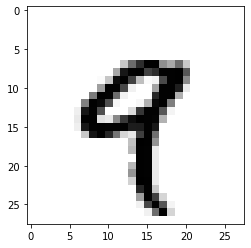

In [29]:
digit = train_images[4] # 다섯번째 샘플

plt.imshow(digit,cmap=plt.cm.binary) # 이미지 출력
plt.show() # 실제 그림을 표시

* 작업순서  
(1) 훈련 데이터를 네트워크에 주입한다.  
(2) 네트워크는 이미지와 레이블을 연관시킬 수 있도록 학습된다.  
(3) test_images에 대한 예측을 네트워크에 요청  
(4) 앞선 예측이 test_labels와 맞는지 확인  

### 2-2 신경망 구조

In [30]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,))) # relu 함수
network.add(layers.Dense(10,activation='softmax')) # 두번째 층

- Dense 층(신경망 층)이 2개가 연속되어 있다.  
- 두번째 층은 10개의 확률 점수가 들어있는 배열을 반환하는 소프트맥스(softmax)층이다. (여기서 배열을 모두 더하면 1이 된다)  
- 각 점수는 현재 숫자 이미지가 10개의 숫자 클래스 중 하나에 속할 확률을 의미한다.

신경망이 훈련 준비를 마치기 위해 컴파일 단계에 포함될 세 가지가 더 필요하다.  
- 손실 함수(loss function) : 훈련 데이터에서 신경망의 성능을 측정하는 방법으로 네트워크가 옳은 방향으로 학습될 수 있도록 도와 준다.  
- 옵티마이저 : 입력된 데이터와 손실 함수를 기반으로 네트워크를 업데이트하는 메커니즘이다.  
- 훈련과 테스트 과정을 모니터링할 지표 : 여기에서는 정확도(정확히 분류된 이미지의 비율)만 고려

### 2-3 컴파일 단계

In [33]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

###  2-4 이미지 데이터 준비하기  
- 데이터를 네트워크에 맞는 크기로 바꾸고 모든 값을 0과 1 사이로 스케일 조정한다.  
=> 신경망은 입력 데이터의 스케일에 민감하여 적절한 데이터 전처리 과정이 필요하다. 이미지의 경우 보통 픽셀의 최댓값인 255로 나누어 사용한다.
- train image -> 0과 1 사이의 값을 가지는 float32타입의 (60000, 28 * 28) 크기인 배열로 바꿈  

In [34]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32') / 255

# 레이블을 범주형으로 인코딩해야 하는 부분(3장)

### 2-5 레이블 준비하기

In [39]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels) # 카테고리화
test_labels = to_categorical(test_labels)

In [36]:
# 훈련 데이터 모델 학습
network.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
60000/60000 [==============================] - 11s 191us/step - loss: 0.2560 - accuracy: 0.9263
Epoch 2/5
60000/60000 [==============================] - 10s 168us/step - loss: 0.1052 - accuracy: 0.9687
Epoch 3/5
60000/60000 [==============================] - 10s 166us/step - loss: 0.0691 - accuracy: 0.9790
Epoch 4/5
60000/60000 [==============================] - 9s 147us/step - loss: 0.0504 - accuracy: 0.9846
Epoch 5/5
60000/60000 [==============================] - 8s 141us/step - loss: 0.0378 - accuracy: 0.9884


- batch_size : 정수 혹은 None. 경사 업데이트 별 샘플의 수. 따로 정하지 않으면 batch_size는 디폴트 값인 32가 된다.  
- epochs : 정수. 모델을 학습시킬 세대의 수. 한 세대는 제공된 모든 x와 y 데이터에 대한 반복이다. initial_epoch이 첫 세대라면, epochs은 "마지막 세대"로 이해하면 된다. 모델은 epochs에 주어진 반복의 수만큼 학습되는 것이 아니라, 단지 epochs 색인의 세대에 도달할 때까지만 학습된다.  
- 출처 : https://keras.io/ko/models/sequential/

[결과]
- 훈련 데이터에 대해 0.9884(98.9%)의 정확도를 금방 달성한다.

In [40]:
# 테스트 세트에서도 모델이 작동하는지 확인
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 224us/step


In [41]:
print('test_acc:', test_acc)

test_acc: 0.9803000092506409


[결과]
- 테스트 세트의 정확도는 0.98%로 나왔다. 훈련 세트 정확도보다는 약간 낮다. 이 정확도 사이의 차이는 과대적합(overfitting)때문이다. 
- 여기서 과대적합이란 머신 러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 경향을 말한다.